# **Covid-19 Sentiment Analysis - Part I**
This part contains data cleaning and exploratory data analysis
## 1. Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

path = './nCoV_100k_train.csv'
with open(path,'r',encoding = 'GB18030', errors = 'ignore') as f:
    raw_data = pd.read_csv(f)
    
raw_data.columns = ['ID', 'time', 'user', 'content', 'pic', 'video', 'sentiment']
raw_data.head()

,ID,time,user,content,pic,video,sentiment
0,4456072029125500,01月01日 23:50,存曦1988,写在年末冬初孩子流感的第五天，我们仍然没有忘记热情拥抱这2020年的第一天。带着一丝迷信，早...,['https://ww2.sinaimg.cn/orj360/005VnA1zly1gah...,[],0
1,4456074167480980,01月01日 23:58,LunaKrys,开年大模型…累到以为自己发烧了腰疼膝盖疼腿疼胳膊疼脖子疼#Luna的Krystallife#?,[],[],-1
2,4456054253264520,01月01日 22:39,小王爷学辩论o_O,邱晨这就是我爹，爹，发烧快好，毕竟美好的假期拿来养病不太好，假期还是要好好享受快乐，爹，新...,['https://ww2.sinaimg.cn/thumb150/006ymYXKgy1g...,[],1
3,4456061509126470,01月01日 23:08,芩鎟,新年的第一天感冒又发烧的也太衰了但是我要想着明天一定会好的?,['https://ww2.sinaimg.cn/orj360/005FL9LZgy1gah...,[],1
4,4455979322528190,01月01日 17:42,changlwj,问：我们意念里有坏的想法了，天神就会给记下来，那如果有好的想法也会被记下来吗？答：那当然了。...,[],[],1


In [2]:
raw_data.shape

(100000, 7)

- **target variable : sentiment**

In [3]:
# keep y with only 1,0,-1
raw_data = raw_data[(raw_data.sentiment == '0') | (raw_data.sentiment == '1') | (raw_data.sentiment == '-1')]
raw_data.shape

(99913, 7)

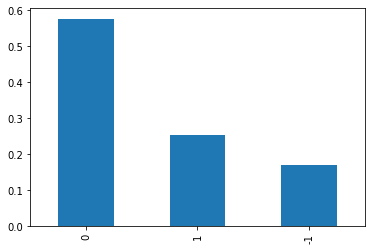

In [4]:
raw_data.sentiment.value_counts(normalize=True).plot(kind='bar')
plt.show()

- **pic and video variables**

In [5]:
raw_data.pic[0] # the url does not contain to much information, we convert photo and video to dummy variables

"['https://ww2.sinaimg.cn/orj360/005VnA1zly1gahhwworn5j30m80fyq4n.jpg']"

In [6]:
def dummy(series):
    if series == '[]':
        series = 0
    else:
        series = 1
    return series
raw_data.pic = raw_data.pic.apply(lambda x: dummy(x))
raw_data.video = raw_data.video.apply(lambda x: dummy(x))
raw_data.head()

,ID,time,user,content,pic,video,sentiment
0,4456072029125500,01月01日 23:50,存曦1988,写在年末冬初孩子流感的第五天，我们仍然没有忘记热情拥抱这2020年的第一天。带着一丝迷信，早...,1,0,0
1,4456074167480980,01月01日 23:58,LunaKrys,开年大模型…累到以为自己发烧了腰疼膝盖疼腿疼胳膊疼脖子疼#Luna的Krystallife#?,0,0,-1
2,4456054253264520,01月01日 22:39,小王爷学辩论o_O,邱晨这就是我爹，爹，发烧快好，毕竟美好的假期拿来养病不太好，假期还是要好好享受快乐，爹，新...,1,0,1
3,4456061509126470,01月01日 23:08,芩鎟,新年的第一天感冒又发烧的也太衰了但是我要想着明天一定会好的?,1,0,1
4,4455979322528190,01月01日 17:42,changlwj,问：我们意念里有坏的想法了，天神就会给记下来，那如果有好的想法也会被记下来吗？答：那当然了。...,0,0,1


- **drop duplicates**

In [7]:
raw_data.ID.value_counts(ascending=False).head()

4466220575191380    2
4463683088077780    2
4470569351337640    2
4460684139742960    1
4465820153259820    1
Name: ID, dtype: int64

In [8]:
raw_data[raw_data.ID == 4463683088077780]
# labels are contradictory, so we drop these three observations

,ID,time,user,content,pic,video,sentiment
35202,4463683088077780,01月22日 23:54,爱你的Moment,愿好人一生平安！//@努力努力再努力x:#抗击新型肺炎第一线#致敬伟大的逆行者们一定要平平安安,1,0,0
62850,4463683088077780,01月22日 23:54,爱你的Moment,愿好人一生平安！//@努力努力再努力x:#抗击新型肺炎第一线#致敬伟大的逆行者们一定要平平安安,1,0,1


In [9]:
raw_data = raw_data[(raw_data.ID !=4470569351337640) & (raw_data.ID !=4463683088077780) & (raw_data.ID !=4466220575191380)]
raw_data.shape

(99907, 7)

- **time**

In [10]:
raw_data.time = pd.to_datetime('2020年'+raw_data.time,errors='coerce', format='%Y年%m月%d日 %H:%M')
raw_data.head()

,ID,time,user,content,pic,video,sentiment
0,4456072029125500,2020-01-01 23:50:00,存曦1988,写在年末冬初孩子流感的第五天，我们仍然没有忘记热情拥抱这2020年的第一天。带着一丝迷信，早...,1,0,0
1,4456074167480980,2020-01-01 23:58:00,LunaKrys,开年大模型…累到以为自己发烧了腰疼膝盖疼腿疼胳膊疼脖子疼#Luna的Krystallife#?,0,0,-1
2,4456054253264520,2020-01-01 22:39:00,小王爷学辩论o_O,邱晨这就是我爹，爹，发烧快好，毕竟美好的假期拿来养病不太好，假期还是要好好享受快乐，爹，新...,1,0,1
3,4456061509126470,2020-01-01 23:08:00,芩鎟,新年的第一天感冒又发烧的也太衰了但是我要想着明天一定会好的?,1,0,1
4,4455979322528190,2020-01-01 17:42:00,changlwj,问：我们意念里有坏的想法了，天神就会给记下来，那如果有好的想法也会被记下来吗？答：那当然了。...,0,0,1


In [11]:
# save to file
raw_data.drop(['user'], axis=1, inplace=True)
raw_data.to_csv('train_df.csv',index_label=False)

## 2. EDA 